In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import json
import datetime
from statistics import mean
import collections

from time import time
import scipy.stats
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn import preprocessing
# for min_max scaling
from mlxtend.preprocessing import minmax_scaling
from sklearn.metrics import mean_squared_error


# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt



# Pandas, and NumPy: 

from time import time


import datetime
import collections

import scipy.stats


In [50]:

# read in all our data
data = pd.read_csv("Bondora_raw.csv")



In [51]:
data.head()

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,...,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.0410,KARU,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1,2020-01-27,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,2009-06-10 15:48:57,0,0,140.6057,koort681,False,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2,2020-01-27,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,2009-06-05 19:12:29,0,0,319.5580,0ie,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,180+
3,2020-01-27,CE67AD25-2951-4BEE-96BD-9C2700C61EF4,668,2009-06-13 12:01:20,2009-06-13 12:01:20,0,0,57.5205,Alyona,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
4,2020-01-27,9408BF8C-B159-4D6A-9D61-9C2400A986E3,652,2009-06-10 10:17:13,2009-06-10 10:17:13,0,0,319.5582,Kai,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,180+


# Feature Engineering for loan duration

In [52]:
data['LoanDuration']

0         12
1          1
2         20
3         15
4         12
          ..
134524    60
134525    60
134526    60
134527    60
134528    60
Name: LoanDuration, Length: 134529, dtype: int64

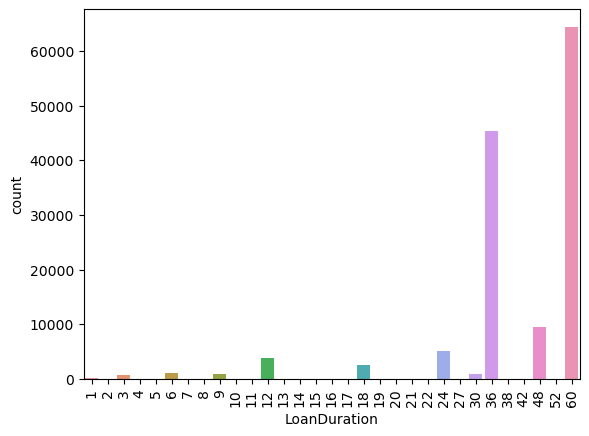

In [53]:
sns.countplot(x='LoanDuration', data=data)
plt.xticks(rotation=90)
plt.show()

In [54]:
data['LoanDuration'].unique()

array([12,  1, 20, 15, 24,  6,  2,  5,  3, 10, 18,  4, 17,  9, 13,  7, 14,
        8, 22, 16, 11, 19, 60, 21, 36, 48, 30, 42, 27, 52, 38],
      dtype=int64)

# Creating sub-groups 

We can divide the 'LoanDuration' column into six categories based on the duration of the loan in years:

- Less than 1 year (1-11 months)
- 1 year (12-23 months)
- 2 years (24-35 months)
- 3 years (36-47 months)
- 4 years (48-59 months)
- 5 years or more (60+ months)


We will create a new column 'LoanDurationCategory' to store the categorical values of the 'LoanDuration' column based on the above categories.

In [55]:
# Define loan categories
lessThan1Year = [0,1,2,3,4,5,6,7,8,9,10,11]
OneYear = [12,13,14,15,16,17,18,19,20,21,22,23]
TwoYears = [24,25,26,27,28,29,30,31,32,33,34,35]
ThreeYears = [36,37,38,39,40,41,42,43,44,45,46,47]
FourYears = [48,49,50,51,52,53,54,55,56,57,58,59]
FiveYears = [60,61,62,63,64,65,66,67,68,69,70]

# Replace loan categories in 'LoanDuration' column
data['LoanDuration'] = data['LoanDuration'].replace({i: 'lessThan1Year' for i in lessThan1Year})\
                           .replace({i: 'OneYear' for i in OneYear})\
                           .replace({i: 'TwoYears' for i in TwoYears})\
                           .replace({i: 'ThreeYears' for i in ThreeYears})\
                           .replace({i: 'FourYears' for i in FourYears})\
                           .replace({i: 'FiveYears' for i in FiveYears})


In [56]:
data['LoanDuration'] 

0               OneYear
1         lessThan1Year
2               OneYear
3               OneYear
4               OneYear
              ...      
134524        FiveYears
134525        FiveYears
134526        FiveYears
134527        FiveYears
134528        FiveYears
Name: LoanDuration, Length: 134529, dtype: object

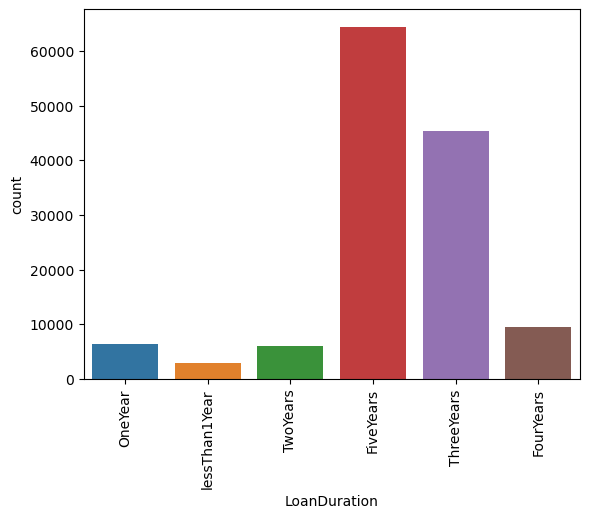

In [57]:
sns.countplot(x='LoanDuration', data=data)
plt.xticks(rotation=90)
plt.show()

# Encode

In [58]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
data['LoanDuration'] = le.fit_transform(data['LoanDuration'])

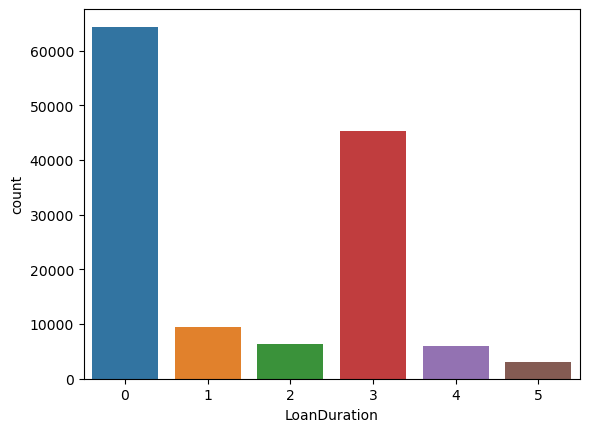

In [59]:
sns.countplot(x='LoanDuration', data=data)
plt.show()

# Feature Engineering for UseOfLoan

In [60]:
data.drop(data[data['UseOfLoan'] == -1].index, inplace=True)


In [61]:
# Define loan categories
loan_consolidation = [0]
personal = [2, 4, 5, 6, 8]
business = [1, 3, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110]

# Replace loan categories in 'UseOfLoan' column
data['UseOfLoan'] = data['UseOfLoan'].replace({i: 'Loan Consolidation' for i in loan_consolidation})\
                           .replace({i: 'Personal' for i in personal})\
                           .replace({i: 'Business' for i in business})\
                           .replace({7: 'Other'})


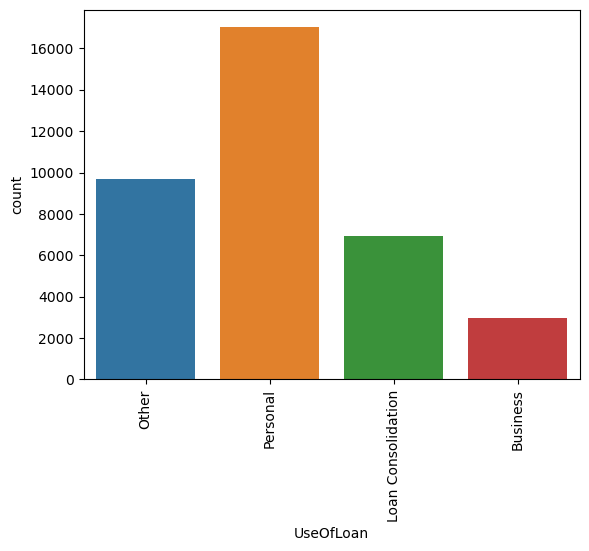

In [62]:
sns.countplot(x='UseOfLoan', data=data)
plt.xticks(rotation=90)
plt.show()

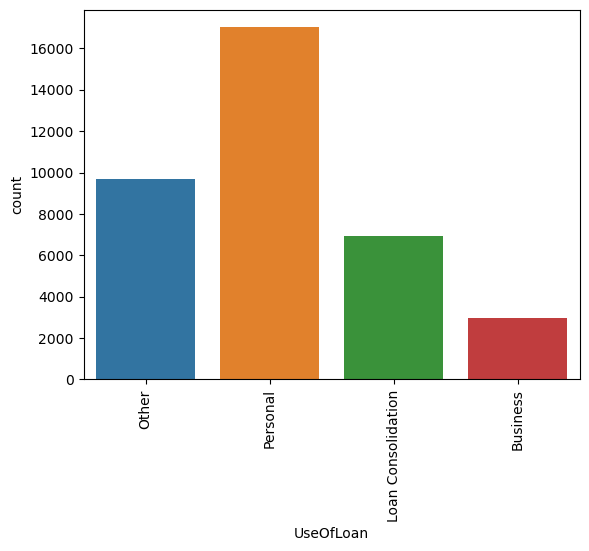

In [63]:
sns.countplot(x='UseOfLoan', data=data)
plt.xticks(rotation=90)
plt.show()

In [64]:
data['UseOfLoan'] = le.fit_transform(data['UseOfLoan'])

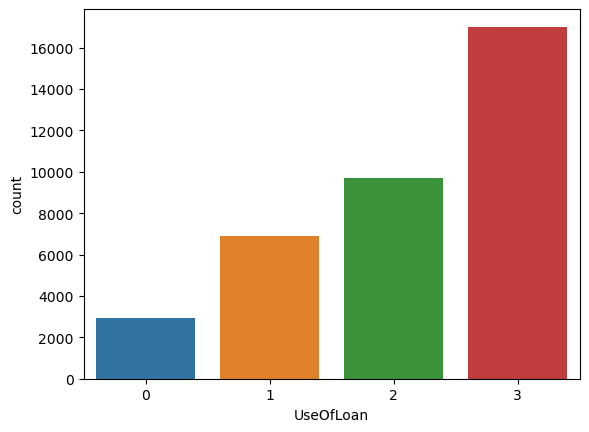

In [65]:
sns.countplot(x='UseOfLoan', data=data)

plt.show()


# Feature Engineering for Work experienc

In [95]:


# Define the mapping dictionary
mapping_dict = {0.0: 'LessThan2Years', 1.0: '2To5Years', 2.0: '5To10Years', 3.0: '15To25Years', 4.0: 'MoreThan25Years'}

# Use map to apply the mapping dictionary to the 'WorkExperience' column
data['WorkExperience'] = data['WorkExperience'].map(mapping_dict)



In [66]:
data['WorkExperience'] = le.fit_transform(data['WorkExperience'])

In [67]:
data['WorkExperience']

0         5
1         5
2         5
3         2
4         3
         ..
134524    1
134525    1
134526    3
134527    5
134528    2
Name: WorkExperience, Length: 36583, dtype: int32

In [68]:
data['WorkExperience'] = data['WorkExperience'].replace({0.0: 'LessThan2Years', 1.0: '2To5Years', 2.0: '5To10Years', 3.0: '15To25Years', 4.0: 'MoreThan25Years'})


# Encoding the status 

In [96]:
data['Status'] = le.fit_transform(data['Status'])

<AxesSubplot:xlabel='Status', ylabel='count'>

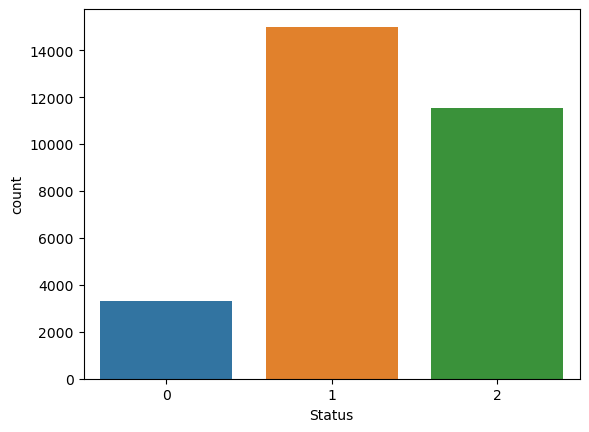

In [97]:
sns.countplot(data.Status)


# Feature Engineering for Education

In [69]:
data = data[(data['Education'] != -1) & (data['Education'] != 0)]


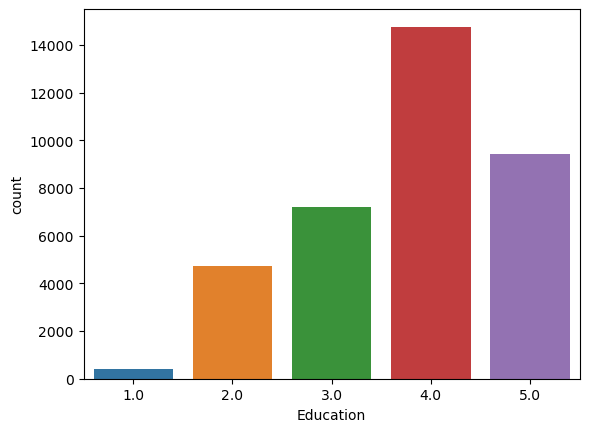

In [23]:
sns.countplot(x='Education', data=data)

plt.show()


# Feature Engineering for gender 

In [24]:
data.drop(data[data['Gender'] == 2.0].index, inplace=True)


<AxesSubplot:xlabel='Gender', ylabel='count'>

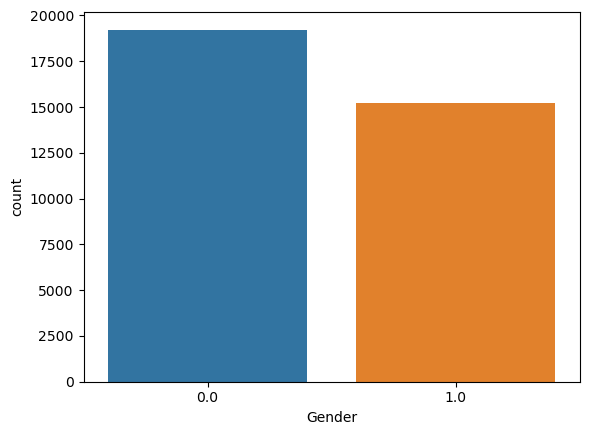

In [25]:
sns.countplot(data.Gender)


# Feature Engineering for EmploymentStatus 

### delete uncoded data

In [70]:
#data = data([data['EmploymentStatus'] != -1)  &  (data[data['EmploymentStatus'] != 0)]



data = data[(data['EmploymentStatus'] != 0) & (data['EmploymentStatus'] != 1)]

#0, 1, 2, 18, 19, 20, 21, 22,
#data = data[(data['Education'] != -1) & (data['Education'] != 0)]


<AxesSubplot:xlabel='EmploymentStatus', ylabel='count'>

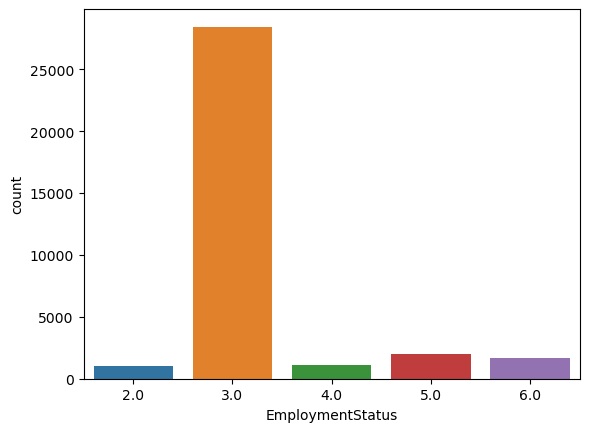

In [27]:
sns.countplot(data.EmploymentStatus)

In [71]:
# Define loan categories
Unemployed = [1.0, 6.0]
employed = [2, 3]
Selfemployed = [5, 4]

# Replace loan categories in 'UseOfLoan' column
data['EmploymentStatus'] = data['EmploymentStatus'].replace({i: 'Unemployed' for i in Unemployed})\
                           .replace({i: 'employed' for i in employed})\
                           .replace({i: 'Selfemployed' for i in Selfemployed})\
                           .replace({7: 'Other'})


<AxesSubplot:xlabel='EmploymentStatus', ylabel='count'>

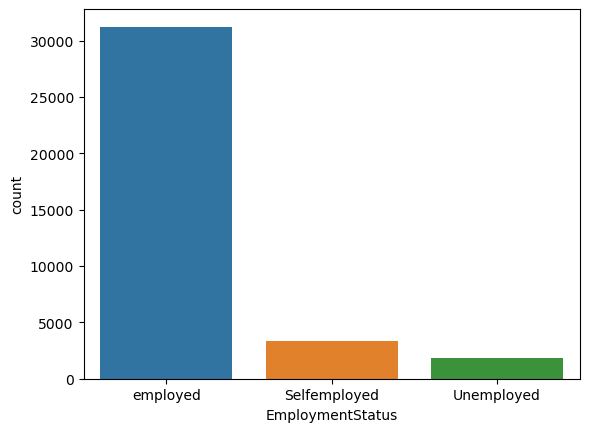

In [72]:
sns.countplot(data.EmploymentStatus)

In [73]:
data['EmploymentStatus'] = le.fit_transform(data['EmploymentStatus'])

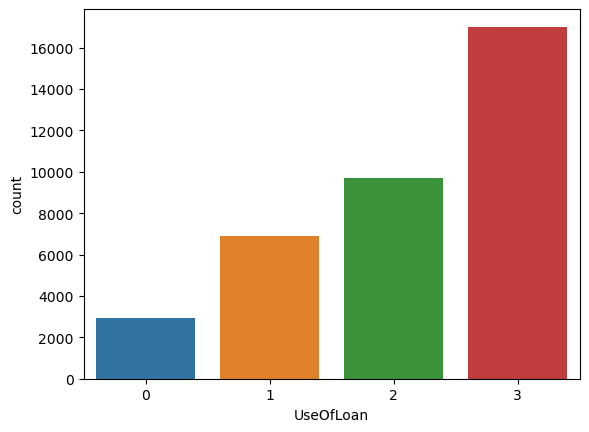

In [74]:
sns.countplot(x='UseOfLoan', data=data)

plt.show()


# Feature Engineering for Age 

In [75]:


data = data[(data['Age'] != 0) & (data['Age'] != 1) & (data['Age'] != 2) & (data['Age'] != 18)]



<AxesSubplot:xlabel='Age', ylabel='count'>

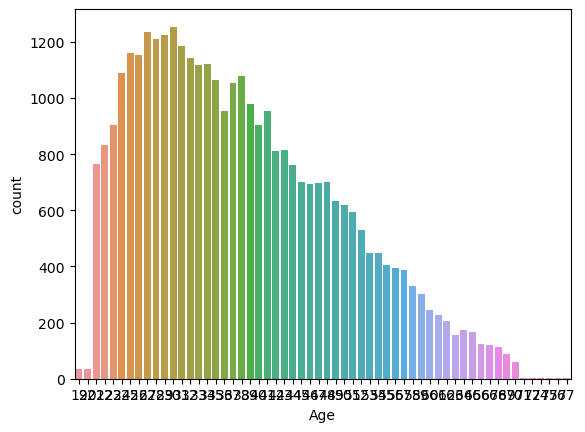

In [32]:
sns.countplot(data.Age)




# Feature Engineering for Status  

In [76]:
data.DefaultDate.isnull()

0          True
1          True
2         False
3          True
4         False
          ...  
134524    False
134525     True
134526    False
134527    False
134528    False
Name: DefaultDate, Length: 36486, dtype: bool

In [77]:
data['DefaultDate'] = data['DefaultDate'].notnull().astype(int)


In [78]:
data['DefaultDate']

0         0
1         0
2         1
3         0
4         1
         ..
134524    1
134525    0
134526    1
134527    1
134528    1
Name: DefaultDate, Length: 36486, dtype: int32

In [79]:
data = data.rename(columns={'DefaultDate': 'Target'})



# Feature Engineering for Eligible Loan Amount (ELA)  

### ELA = Income - Liabilities

In [80]:
data['ELA'] = data['IncomeTotal'] - data['LiabilitiesTotal']


In [81]:
data['ELA']

0         10500.00
1         10800.00
2          7000.00
3         11600.00
4          6800.00
            ...   
134524      900.00
134525      487.54
134526     1150.00
134527     -192.05
134528      -31.03
Name: ELA, Length: 36486, dtype: float64


# Feature Engineering for Rate Of Interest (ROI)  
### ROI = investment gain / investment base.
###### ROI for each loan based on the AppliedAmount and InterestAndPenaltyDebtServicingCost columns:

In [82]:
 
# calculate ROI
data['ROI'] = data['AppliedAmount'] * (data['InterestAndPenaltyDebtServicingCost'] / 100)


In [83]:
data['ROI']

0             0.00
1             0.00
2             0.00
3             0.00
4             0.00
            ...   
134524    31201.80
134525        0.00
134526    26296.25
134527    26685.00
134528    18144.00
Name: ROI, Length: 36486, dtype: float64


# Feature Engineering for Rate Of Interest (EMI)  
### ROI = investment gain / investment base.
###### ROI for each loan based on the AppliedAmount and InterestAndPenaltyDebtServicingCost columns:

In [84]:
def calculate_emi(loan_amount, interest_rate, loan_duration):
    r = (interest_rate/100)/12
    n = loan_duration*12
    if n == 0:
        return 0
    emi = loan_amount*r*((1+r)**n)/(((1+r)**n)-1)
    return emi


In [85]:
data['EMI'] = data.apply(lambda x: calculate_emi(x['AppliedAmount'], x['Interest'], x['LoanDuration']), axis=1)


In [86]:
data

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,...,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory,ELA,ROI,EMI
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.0410,KARU,True,...,NaN,NaN,NaN,NaN,0.0,0.00,NaN,10500.00,0.00,17.867400
1,2020-01-27,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,2009-06-10 15:48:57,0,0,140.6057,koort681,False,...,NaN,NaN,NaN,NaN,0.0,0.00,NaN,10800.00,0.00,5.627673
2,2020-01-27,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,2009-06-05 19:12:29,0,0,319.5580,0ie,True,...,NaN,NaN,NaN,NaN,0.0,0.00,180+,7000.00,0.00,17.055307
3,2020-01-27,CE67AD25-2951-4BEE-96BD-9C2700C61EF4,668,2009-06-13 12:01:20,2009-06-13 12:01:20,0,0,57.5205,Alyona,True,...,NaN,NaN,NaN,NaN,0.0,0.00,NaN,11600.00,0.00,8.170325
4,2020-01-27,9408BF8C-B159-4D6A-9D61-9C2400A986E3,652,2009-06-10 10:17:13,2009-06-10 10:17:13,0,0,319.5582,Kai,True,...,NaN,NaN,NaN,NaN,0.0,0.00,180+,6800.00,0.00,17.867400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134524,2020-01-27,A9C9EF0F-4E79-4930-BA8A-A4130077FCC2,283484,2015-01-02 16:31:36,2015-01-02 16:31:36,2515,0,485.0000,BO73K5A6A,True,...,NaN,NaN,NaN,NaN,0.0,1040.06,180+,900.00,31201.80,0.000000
134525,2020-01-27,787345C2-7606-4F72-8FE2-A4170082D77C,285168,2015-01-05 16:14:26,2015-01-05 16:14:26,1880,0,1120.0000,BO311A49,False,...,NaN,NaN,NaN,NaN,0.0,0.00,NaN,487.54,0.00,0.000000
134526,2020-01-27,E2D3384D-289A-4B4D-A2DA-A40F00F7C755,281602,2015-01-02 14:04:27,2015-01-02 14:04:27,1975,0,525.0000,BO41K639A,True,...,NaN,0.0,60.0,NaN,0.0,1051.85,8-15,1150.00,26296.25,0.000000
134527,2020-01-27,7CC7AB74-995B-4467-958A-A41700F78D59,285431,2015-01-05 16:56:12,2015-01-05 16:56:12,1840,0,1160.0000,BO45A925,False,...,NaN,NaN,NaN,NaN,0.0,889.50,31-60,-192.05,26685.00,0.000000


In [44]:


#data = data[(data['PrincipalDebtServicingCost'] != 0)]



In [45]:


#data = data[(data['InterestAndPenaltyDebtServicingCost'] != 0)]



In [46]:


#data = data[(data['InterestAndPenaltyWriteOffs'] != 0)]



In [47]:


#data = data[(data['PrincipalWriteOffs'] != 0)]



In [48]:


data = data[(data['AppliedAmount'] != 0)]



In [130]:


#data = data[(data['PrincipalDebtServicingCost'] != 0)]




#data = data[(data['InterestAndPenaltyDebtServicingCost'] != 0)]


#data = data[(data['InterestAndPenaltyWriteOffs'] != 0)]



#data = data[(data['PrincipalWriteOffs'] != 0)]



#data = data[(data['Interest'] != 0)]


data = data[(data['AppliedAmount'] != 0)]





In [89]:

drop_cols=['BidsApi', 'BidsPortfolioManager', 'BidsPortfolioManager', 'BidsManual',
           'CurrentDebtDaysPrimary', 'CurrentDebtDaysPrimary', 'PrincipalOverdueBySchedule', 
           'PrincipalOverdueBySchedule', 'PrincipalOverdueBySchedule', 'IncomeFromPrincipalEmployer',
           'IncomeFromPension', 'EAD1', 'EAD2', 'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
           'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther', 'ReportAsOfEOD', 'LoanId','LoanNumber',
           'ListedOnUTC','DateOfBirth','BiddingStartedOn','UserName','LoanApplicationStartedDate','FirstPaymentDate',
           'LoanApplicationStartedDate','ApplicationSignedHour', 'ApplicationSignedWeekday',
           'ActiveScheduleFirstPaymentReached','ModelVersion','WorseLateCategory','PlannedPrincipalTillDate',
         'ProbabilityOfDefault', 'ExpectedLoss', 'LossGivenDefault', 'ExpectedReturn', 'GracePeriodStart', 'GracePeriodEnd',
           'NextPaymentDate', 'NextPaymentNr', 'PreviousEarlyRepaymentsBefoleLoan', 'PreviousRepaymentsBeforeLoan',
           "NrOfScheduledPayments","ReScheduledOn",
           "ActiveLateLastPaymentCategory", 'PlannedInterestTillDate', 'CurrentDebtDaysSecondary',
           'PlannedPrincipalPostDefault', 'PlannedInterestPostDefault', 'PrincipalRecovery',
           'InterestRecovery', 'RecoveryStage', 'EL_V0', 'EL_V0', 'NrOfDependants', 'Rating_V0', 'CreditScoreEsEquifaxRisk', 
          'CreditScoreFiAsiakasTietoRiskGrade', 'GracePeriodStart','GracePeriodEnd', 'CreditScoreEeMini', 'PrincipalPaymentsMade',
           'MonthlyPaymentDay','LastPaymentOn', 'DebtOccuredOn', 'DebtOccuredOnForSecondary', 'StageActiveSince', 'EL_V1', 
           'Rating_V1', 'Rating_V2', 'ActiveLateCategory','CreditScoreEsMicroL', 'NewCreditCustomer','LoanDate',
           'NewCreditCustomer','LoanDate','ContractEndDate','MaturityDate_Original','MaturityDate_Last', 'ContractEndDate', 'MaturityDate_Original', 'MaturityDate_Last'
                                  , 'Restructured', 'InterestAndPenaltyPaymentsMade', 
                                    
                                  'PrincipalBalance', 'InterestAndPenaltyBalance',  
                                  'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan', 
                                  'PreviousEarlyRepaymentsCountBeforeLoan', 'VerificationType', 'LanguageCode',
                                    'OccupationArea', 'ExistingLiabilities',
                                   'RefinanceLiabilities', 'EmploymentDurationCurrentEmployer', 'County', 'City', 'Country', 'Rating', 'EmploymentPosition']
print(len(drop_cols))
data.drop(drop_cols,axis=1,inplace=True)





103


In [90]:
data

,Age,Gender,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,...,DebtToIncome,Target,Status,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ELA,ROI,EMI
0,61,1.0,319.5582,115.0408,30.00,2,NaN,2,3.0,1.0,...,0.00,0,Repaid,0.00,0.00,0.0,0.00,10500.00,0.00,17.867400
1,48,1.0,191.7349,140.6057,25.00,5,NaN,2,5.0,4.0,...,0.00,0,Repaid,0.00,0.00,0.0,0.00,10800.00,0.00,5.627673
2,58,1.0,319.5582,319.5409,25.00,2,NaN,3,4.0,1.0,...,0.00,1,Late,0.00,0.00,0.0,0.00,7000.00,0.00,17.055307
3,23,1.0,127.8233,57.5205,45.00,2,NaN,1,2.0,3.0,...,0.00,0,Repaid,0.00,0.00,0.0,0.00,11600.00,0.00,8.170325
4,25,1.0,319.5582,319.5436,30.00,2,NaN,3,4.0,2.0,...,0.00,1,Repaid,0.00,2.40,0.0,0.00,6800.00,0.00,17.867400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134524,37,0.0,3000.0000,3000.0000,31.01,0,107.68,1,3.0,3.0,...,7.69,1,Repaid,691.81,1552.18,0.0,1040.06,900.00,31201.80,0.000000
134525,35,0.0,3000.0000,3000.0000,18.25,0,85.33,3,3.0,3.0,...,31.58,0,Repaid,0.00,0.00,0.0,0.00,487.54,0.00,0.000000
134526,40,0.0,2500.0000,2500.0000,24.83,0,80.42,1,3.0,1.0,...,3.22,1,Late,0.00,0.00,0.0,1051.85,1150.00,26296.25,0.000000
134527,47,1.0,3000.0000,3000.0000,17.74,0,84.51,2,5.0,1.0,...,44.35,1,Repaid,742.46,4829.92,0.0,889.50,-192.05,26685.00,0.000000


In [92]:
print(data.isnull().sum())



Age                                       0
Gender                                    0
AppliedAmount                             0
Amount                                    0
Interest                                  0
LoanDuration                              0
MonthlyPayment                         6621
UseOfLoan                                 0
Education                                 0
MaritalStatus                             0
EmploymentStatus                          0
WorkExperience                            0
HomeOwnershipType                      1588
IncomeTotal                               0
LiabilitiesTotal                          0
DebtToIncome                              0
Target                                    0
Status                                    0
PrincipalWriteOffs                        0
InterestAndPenaltyWriteOffs               0
PrincipalDebtServicingCost                0
InterestAndPenaltyDebtServicingCost       0
ELA                             

In [94]:


# assuming your data is stored in a dataframe called 'df'
data.dropna(subset=['MonthlyPayment', 'HomeOwnershipType'], inplace=True)


In [95]:
data

,Age,Gender,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,...,DebtToIncome,Target,Status,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ELA,ROI,EMI
14,20,0.0,319.5582,319.56,40.00,5,0.00,0,3.0,3.0,...,0.00,1,Late,0.00,0.00,0.0,0.00,26500.00,0.000000,12.383405
40,49,1.0,319.5582,319.56,30.00,2,0.00,2,2.0,4.0,...,0.00,1,Late,0.00,0.00,0.0,0.00,6200.00,0.000000,17.867400
51,19,0.0,319.5582,70.30,49.00,5,0.00,3,2.0,2.0,...,0.00,1,Late,0.00,0.00,0.0,0.00,12000.00,0.000000,14.348611
93,41,0.0,191.7349,191.75,30.00,2,0.00,3,5.0,1.0,...,0.00,1,Late,0.00,0.00,0.0,54.14,22000.00,103.805275,10.720439
171,19,0.0,115.0410,19.17,49.00,5,0.00,2,2.0,2.0,...,0.00,1,Late,0.00,0.00,0.0,0.00,8700.00,0.000000,5.165502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134524,37,0.0,3000.0000,3000.00,31.01,0,107.68,1,3.0,3.0,...,7.69,1,Repaid,691.81,1552.18,0.0,1040.06,900.00,31201.800000,0.000000
134525,35,0.0,3000.0000,3000.00,18.25,0,85.33,3,3.0,3.0,...,31.58,0,Repaid,0.00,0.00,0.0,0.00,487.54,0.000000,0.000000
134526,40,0.0,2500.0000,2500.00,24.83,0,80.42,1,3.0,1.0,...,3.22,1,Late,0.00,0.00,0.0,1051.85,1150.00,26296.250000,0.000000
134527,47,1.0,3000.0000,3000.00,17.74,0,84.51,2,5.0,1.0,...,44.35,1,Repaid,742.46,4829.92,0.0,889.50,-192.05,26685.000000,0.000000


In [99]:
data.to_csv('modiefed_data.csv', index=False)

In [100]:
data

,Age,Gender,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,...,DebtToIncome,Target,Status,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ELA,ROI,EMI
14,20,0.0,319.5582,319.56,40.00,5,0.00,0,3.0,3.0,...,0.00,1,1,0.00,0.00,0.0,0.00,26500.00,0.000000,12.383405
40,49,1.0,319.5582,319.56,30.00,2,0.00,2,2.0,4.0,...,0.00,1,1,0.00,0.00,0.0,0.00,6200.00,0.000000,17.867400
51,19,0.0,319.5582,70.30,49.00,5,0.00,3,2.0,2.0,...,0.00,1,1,0.00,0.00,0.0,0.00,12000.00,0.000000,14.348611
93,41,0.0,191.7349,191.75,30.00,2,0.00,3,5.0,1.0,...,0.00,1,1,0.00,0.00,0.0,54.14,22000.00,103.805275,10.720439
171,19,0.0,115.0410,19.17,49.00,5,0.00,2,2.0,2.0,...,0.00,1,1,0.00,0.00,0.0,0.00,8700.00,0.000000,5.165502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134524,37,0.0,3000.0000,3000.00,31.01,0,107.68,1,3.0,3.0,...,7.69,1,2,691.81,1552.18,0.0,1040.06,900.00,31201.800000,0.000000
134525,35,0.0,3000.0000,3000.00,18.25,0,85.33,3,3.0,3.0,...,31.58,0,2,0.00,0.00,0.0,0.00,487.54,0.000000,0.000000
134526,40,0.0,2500.0000,2500.00,24.83,0,80.42,1,3.0,1.0,...,3.22,1,1,0.00,0.00,0.0,1051.85,1150.00,26296.250000,0.000000
134527,47,1.0,3000.0000,3000.00,17.74,0,84.51,2,5.0,1.0,...,44.35,1,2,742.46,4829.92,0.0,889.50,-192.05,26685.000000,0.000000
